# Problem Statement

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. 

### Data Description

There are several types of data that is collected from customers by a telecomminucation service provider. Some of the information that you have to look for data analysis and EDA is given below:
- Recharging of the service: There are several variables that describe the duration, maximum, total amount and average of the recharge price of the service they avail, which include the 2G service, the 3G service, internet packages and call services
  - av_rech_amt_data: Average recharge data amount
  - count_rech_2g: Number of customers using 2G
  - count_rech_3g: Number of customers using 3G
  - max_rech_data: Maximum recharge for mobile internet
  - total_rech_data: Total recharge for mobile internet
  - max_rech_amt: Maximum recharge amount
  - total_rech_amt: Total recharge amount
  - total_rech_num: Total number of times customer recharged

If there are missing values in the columns corresponding to these variables, this is because the customer did not recharge that month.

- Call and Internet service: They specify the amount of calls, type of calling service used (STD, ISD, Roaming), type of internet service and amount of internet usage over a specific period of time
  - total_calls_mou: Total minutes of voice calls
  - total_internet_mb: Total amount of internet usage in MB
  - arpu: Average revenue per usage
  - onnet_mou: The minutes of usage for all kind of calls within the same operator network
  - offnet_mou: The minutes of usage for all kind of calls outside the operator T network
  - Minutes of usage for outgoing calls for each type of call service:
    - loc_og_mou
    - std_og_mou
    - isd_og_mou
    - spl_og_mou
    - roam_og_mou
    - total_og_mou
  - Minutes of usage for incoming calls for each type of call service:
    - loc_ic_mou
    - std_ic_mou
    - isd_ic_mou
    - spl_ic_mou
    - roam_ic_mou
    - total_ic_mou
  - total_rech_num: Total number of recharge
  - total_rech_amt: Total amount of recharge
  - max_rech_amt: Maximum recharge amount
  - total_rech_data: Total recharge for mobile internet
  - max_rech_data: Maximum recharge for mobile internet
  - av_rech_amt_data: Average recharge amount for mobile internet
  - vol_2g_mb: Mobile internet usage volumn for 2G
  - vol_3g_mb: Mobile internet usage volumn for 3G

If the columns corresponding to some of these variables that have more than 70% of missing values, you can drop those variables from the data set. If not, then you can use the MICE technique to impute the values in those missing entries.

The categorical variables present in the data set are given below:
  - night_pck_user: Prepaid service schemes for use during specific night hours only
  - fb_user: Service scheme to avail services of Facebook and similar social networking sites

If there are missing values, this means that there is another scheme that the customer has availed from the telecomminucation service.

Most of the variables have their values recorded for 4 different months. The variable names end with the month number as explained below:
- *.6: KPI for the month of June
- *.7: KPI for the month of July
- *.8: KPI for the month of August
- *.9: KPI for the month of September

The rest of variables have been defined in the detailed data description.

# Task 1: Importing the required libraries and loading the data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# read the data
churn = pd.read_csv("/content/telecom_churn_data.csv")

# Task 2: Understanding and exploring the data 

1.   List item
2.   List item



In [3]:
# look at initial rows of the data
churn.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4.0,3.0,2.0,6.0,362.0,252

In [4]:
# summary of different feature types
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33554 entries, 0 to 33553
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

In [5]:
# analysis of data statistics
churn.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,33554.0,33215.0,33215.0,33215.0,33554,33327,33161,32970,33554.000000,33554.000000,33554.000000,33554.000000,32243.000000,32249.000000,31727.000000,30925.00000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.000000,32249.000000,31727.000000,30925.000000,32243.00000

In [6]:
# create backup of data
original = churn.copy()

In [7]:
# create column name list by types of columns
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

In [8]:
# look at missing value ratio in each column

missing = churn.isnull().mean()*100
missing.sort_values(ascending = False)

arpu_3g_6                   74.649818
av_rech_amt_data_6          74.649818
fb_user_6                   74.649818
night_pck_user_6            74.649818
total_rech_data_6           74.649818
max_rech_data_6             74.649818
count_rech_2g_6             74.649818
count_rech_3g_6             74.649818
date_of_last_rech_data_6    74.649818
arpu_2g_6                   74.649818
av_rech_amt_data_7          74.417357
date_of_last_rech_data_7    74.417357
max_rech_data_7             74.417357
total_rech_data_7           74.417357
arpu_3g_7                   74.417357
fb_user_7                   74.417357
count_rech_3g_7             74.417357
arpu_2g_7                   74.417357
night_pck_user_7            74.417357
count_rech_2g_7             74.417357
arpu_3g_9                   74.086547
max_rech_data_9             74.086547
date_of_last_rech_data_9    74.086547
total_rech_data_9           74.086547
arpu_2g_9                   74.086547
count_rech_2g_9             74.086547
night_pck_us

### i) Impute missing values with zeroes

Now that we have the information about the amount of missing values in each column, we can go ahead and perform some imputing and deleting. 

First, we will start with the columns corresponding to the "recharging of the service" information. 

In [9]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].fillna(0)

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33551,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
33552,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [10]:
# Observe whether the date of the last recharge and the total recharge data value are missing together
# You can do this by displaying the rows that have null values in these two variables

### CODE HERE ###
missing_rows = churn[churn[['date_of_last_rech_6', 'total_rech_data_6']].isnull().any(axis=1)]
missing_rows


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.9

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [11]:
# create a list of recharge columns where we will impute missing values with zeroes
recharge_cols = [col for col in churn.columns if 'rech' in col]
numeric_recharge_cols = churn[recharge_cols].select_dtypes(include=['float64']).columns
zero_impute_cols = [col for col in numeric_recharge_cols if churn[col].min()!=1]


In [12]:
# impute missing values with 0 for the above mentioned list of recharge columns

for col in zero_impute_cols:
    churn[col] = churn[col].fillna(0)


In [13]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
missing_value_ratio = (churn.isna().sum() / churn.shape[0]) * 100
print(missing_value_ratio)


# summary
print("\n\nSummary statistics\n")
print(churn.describe())


Missing value ratio:

circle_id                    0.000000
loc_og_t2o_mou               1.010312
std_og_t2o_mou               1.010312
loc_ic_t2o_mou               1.010312
last_date_of_month_6         0.000000
last_date_of_month_7         0.676521
last_date_of_month_8         1.171246
last_date_of_month_9         1.740478
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.907135
onnet_mou_7                  3.889253
onnet_mou_8                  5.444954
onnet_mou_9                  7.835131
offnet_mou_6                 3.907135
offnet_mou_7                 3.889253
offnet_mou_8                 5.444954
offnet_mou_9                 7.835131
roam_ic_mou_6                3.907135
roam_ic_mou_7                3.889253
roam_ic_mou_8                5.444954
roam_ic_mou_9                7.835131
roam_og_mou_6                3.907135
roam_og_mou_7               

In [14]:
# drop id and all the date columns
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (33554, 225)
Shape after dropping:  (33554, 212)


### ii) Replace NaN values in categorical variables

---



## We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [15]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].fillna(-1)

In [16]:
# missing value ratio
print("Missing value ratio:\n")
missing_value_ratio = (churn.isna().sum() / churn.shape[0]) * 100
print(missing_value_ratio)

Missing value ratio:

loc_og_t2o_mou         1.010312
std_og_t2o_mou         1.010312
loc_ic_t2o_mou         1.010312
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.907135
onnet_mou_7            3.889253
onnet_mou_8            5.444954
onnet_mou_9            7.835131
offnet_mou_6           3.907135
offnet_mou_7           3.889253
offnet_mou_8           5.444954
offnet_mou_9           7.835131
roam_ic_mou_6          3.907135
roam_ic_mou_7          3.889253
roam_ic_mou_8          5.444954
roam_ic_mou_9          7.835131
roam_og_mou_6          3.907135
roam_og_mou_7          3.889253
roam_og_mou_8          5.444954
roam_og_mou_9          7.835131
loc_og_t2t_mou_6       3.907135
loc_og_t2t_mou_7       3.889253
loc_og_t2t_mou_8       5.444954
loc_og_t2t_mou_9       7.835131
loc_og_t2m_mou_6       3.907135
loc_og_t2m_mou_7       3.889253
loc_og_t2m_mou_8       5.444954
loc_og_t2m_mou_9  

### iii) Drop variables with more than a given threshold of missing values

Here, we will be removing the column variables that have more than 70% of its elements missing. 

In [17]:
initial_cols = churn.shape[1]

# Insert the threshold value of missing entries
MISSING_THRESHOLD = 70

# Extract a list of columns that have less than the threshold of missing values
cols_to_keep = [col for col in churn.columns if missing_value_ratio[col] < MISSING_THRESHOLD]

In [18]:
# Include the columns extracted in the above list in the main data set 
# These columns will have the percentage of missing values less than the threshold
### CODE HERE ###
churn = churn[cols_to_keep]


# Display the number of columns dropped
print("Number of columns before dropping: ", initial_cols)
print("Number of columns after dropping: ", churn.shape[1])

Number of columns before dropping:  212
Number of columns after dropping:  193


In [19]:
# look at missing value ratio in each column
missing_value_ratio = (churn.isnull().sum()/len(churn))*100
missing_value_ratio.sort_values(ascending = False)

std_og_t2c_mou_9      7.838112
og_others_9           7.838112
std_ic_t2f_mou_9      7.838112
std_ic_t2o_mou_9      7.838112
std_og_t2m_mou_9      7.838112
std_ic_t2m_mou_9      7.838112
std_og_t2f_mou_9      7.838112
std_og_mou_9          7.838112
isd_og_mou_9          7.838112
spl_og_mou_9          7.838112
std_ic_t2t_mou_9      7.838112
spl_ic_mou_9          7.838112
loc_ic_t2t_mou_9      7.838112
loc_ic_mou_9          7.838112
isd_ic_mou_9          7.838112
loc_ic_t2m_mou_9      7.838112
std_ic_mou_9          7.838112
loc_ic_t2f_mou_9      7.838112
ic_others_9           7.838112
loc_og_t2t_mou_9      7.835131
loc_og_mou_9          7.835131
loc_og_t2c_mou_9      7.835131
loc_og_t2f_mou_9      7.835131
loc_og_t2m_mou_9      7.835131
std_og_t2t_mou_9      7.835131
onnet_mou_9           7.835131
offnet_mou_9          7.835131
roam_ic_mou_9         7.835131
roam_og_mou_9         7.835131
isd_og_mou_8          5.447935
std_ic_t2m_mou_8      5.447935
spl_ic_mou_8          5.447935
isd_ic_m

### iv) Impute missing values using MICE

[MICE](https://scikit-learn.org/stable/modules/impute.html) is called "Multiple Imputation by Chained Equation". It uses machine learning techniques in order to see what are the trends in the values of that column. Using this information, it will smartly fill in the missing values in that column.

MICE is now called Iterative Imputer. 

You can specify the machine learning algorithm to be used in order to fill in the missing values of that column.

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

So, we will be using linear regression for filling the missing values in the rest of the numeric columns.

In [21]:
churn_cols = churn.columns

# using MICE technique to impute missing values in the rest of the columns
lr = LinearRegression()

# Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
# Note: Set the 'estimator' parameter to 'lr'  - This specifies that we will be using linear regression to estimate the missing values
# Note: Set the 'missing_values' parameter to 'np.nan' - This specifies that we have impute the entries which are NaNs
# Note: Set the 'max_iter' parameter to '1' - This specifies the number of iterations the algorithm scans through the data set 
#       to converge to appropriate values it is going to impute in the missing entries. It takes around 6 min to run.
# Note: Set the 'verbose' parameter to '2' - This specifies the amount of details it will show while imputing 
# Note: Set the 'imputation_order' parameter to 'roman' - This specifies the order in which features will be imputed. 'roman' means left to right
# Note: Set the 'random_state' parameter to '0' - This is for reproducibility

imputer = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=1, verbose=2, imputation_order='roman', random_state=0)
churn_imputed = imputer.fit_transform(churn)

[IterativeImputer] Completing matrix with shape (33554, 193)
[IterativeImputer] Ending imputation round 1/1, elapsed time 129.19
[IterativeImputer] Change: 265694889.04226056, scaled tolerance: 45.735400000000006 


In [22]:
churn_imputed

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.01200000e+02,  3.58000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  4.17000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.25309229e+05, -5.44601882e+06,  5.37827083e+05]])

In [23]:
# convert imputed numpy array to pandas dataframe
churn_imputed = pd.DataFrame(churn_imputed, columns=churn_cols)
churn_imputed

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,1780.577871,817.546257,0.000000,6633.547665,390.033382,770.270931,0.000000,1134.965998,22514.467733,45976.247380,0.000000,56629.024092,420.174220,1983.138822,0.000000,1519.236531,38.811457,29.866778,0.000000,30.607710,92.992273,91.472668,0.000000,91.502410,3.695590,3.760689,0.000000,3.590755,-4236.402343,789.730647,0.000000,-12864.970889,4.760151,-13.461756,0.000000,-14.043604,88.473848,92.595502,0.000000,92.903448,87.830272,91.209432,0.000000,83.853521,1.141739,1.127720,0.000000,1.090437,0.0,0.0,0.0,0.0,119.920461,125.585001,0.000000,120.171329,-110.266207,-102.168715,0.000000,-102.087447,-2.802254,-0.340566,0.000000,3.958703,0.117466,-0.184367,0.000000,0.025630,0.000000,0.00000,0.000000,0.000000,52.274217,47.530406,0.160000,51.788404,108.309985,107.606126,4.130000,106.651950,12.012222,12.512617,1.150000,11.908566,69.012932,61.556646,5.440000,66.502220,22.887564,22.076783,0.000000,24.155091,21.365514,22.425721,0.000000,19.087336,2.228348,2.361437,0.000000,2.224949,0.0,0.0,0.0,0.0,1.087965,1.729829,0.000000,-0.324176,0.000000,0.000000,5.440000,0.000000,-64.644572,-63.159240,0.000000,-68.020832,2.498117,3.365745,0.000000,7.181628

You can now see that we have removed or filled all the missing values from the data set. We will now proceed to feature engineering to further prepare the data for testing machine learning and deep learning models.

# Task 3: Feature engineering

### Filter high-value customers

### Calculate total data recharge amount

In [24]:
# calculate and store the total data recharge amount for June --> number of data recharges * average data recharge amount
# You have to use the total recharge for data and the average recharge amount for data
# June, July, August and September - The months are encoded as 6, 7, 8 and 9, respectively.
churn_imputed['av_rech_amt_data_6'] = churn_imputed['total_rech_num_6'].mean()
churn_imputed['total_data_rech_6'] = churn_imputed['count_rech_3g_6'] * churn_imputed['av_rech_amt_data_6']

# calculate and store the total data recharge amount for July --> number of data recharges * average data recharge amount

### CODE HERE ###
churn_imputed['av_rech_amt_data_7'] = churn_imputed['total_rech_num_7'].mean()
churn_imputed['total_data_rech_7'] = churn_imputed['count_rech_3g_7'] * churn_imputed['av_rech_amt_data_7']



Add total data recharge and total recharge to get total combined recharge amount for a month

1.   List item
2.   List item



In [25]:
# calculate and store total recharge amount for call and internet data for June --> total call recharge amount + total data recharge amount

### CODE HERE ###
churn_imputed['total_rech_amt_6'] = churn_imputed['total_data_rech_6'] + churn_imputed['total_rech_num_6']


# calculate and store total recharge amount for call and internet data for July --> total call recharge amount + total data recharge amount

### CODE HERE ###
churn_imputed['total_rech_amt_7'] = churn_imputed['total_data_rech_7'] + churn_imputed['total_rech_num_7']


In [26]:
# calculate average data recharge amount done by customer in June and July

### CODE HERE ###
churn_imputed['total_data_rech_amt_6'] = churn_imputed['total_rech_num_6'] / churn_imputed['av_rech_amt_data_6'] * churn_imputed['av_rech_amt_data_6']
churn_imputed['total_data_rech_amt_7'] = churn_imputed['total_rech_num_7'] / churn_imputed['av_rech_amt_data_7'] * churn_imputed['av_rech_amt_data_7']

In [27]:
# evaluate and display the 70th percentile average data recharge amount of June and July

### CODE HERE ###
june_70th_percentile = np.percentile(churn_imputed['av_rech_amt_data_6'], 70)
july_70th_percentile = np.percentile(churn_imputed['av_rech_amt_data_7'], 70)

print("70th percentile of average data recharge amount of June: ", june_70th_percentile)
print("70th percentile of average data recharge amount of July: ", july_70th_percentile)

70th percentile of average data recharge amount of June:  7.564612266793825
70th percentile of average data recharge amount of July:  7.701883531024617


In [28]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
# You have see whether each customer row has the average data recharge amount more than the 70th percentile of the average data recharge amount

### CODE HERE ###
churn_imputed = churn_imputed[(churn_imputed['av_rech_amt_data_6'] >= june_70th_percentile) & (churn_imputed['av_rech_amt_data_7'] >= july_70th_percentile)]

#print the shape of the data set
print(churn_imputed.shape)

(33554, 198)


In [29]:
# delete variables created to filter high-value customers
### CODE HERE ###
churn_imputed = churn_imputed.drop(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9'], axis=1)


In [30]:
# Display the number of customers retained in the data set
print(f"Number of high-value customers retained in the data set: {churn_imputed.shape[0]}")
### CODE HERE ###

Number of high-value customers retained in the data set: 33554


### Derive churn

In [31]:
# calculate total incoming and outgoing minutes of usage for the month of September

### CODE HERE ###
churn_imputed['total_ic_mou_9'] = churn_imputed['total_ic_mou_6'] + churn_imputed['total_ic_mou_7'] + churn_imputed['total_ic_mou_8'] + churn_imputed['total_ic_mou_9']
churn_imputed['total_og_mou_9'] = churn_imputed['total_og_mou_6'] + churn_imputed['total_og_mou_7'] + churn_imputed['total_og_mou_8'] + churn_imputed['total_og_mou_9']

In [32]:
# calculate the total volumn of 2g and 3g data consumption for the month of September

### CODE HERE ###
churn_imputed['vol_2g_mb_9'] = churn_imputed['vol_2g_mb_6'] + churn_imputed['vol_2g_mb_7'] + churn_imputed['vol_2g_mb_8'] + churn_imputed['vol_2g_mb_9']
churn_imputed['vol_3g_mb_9'] = churn_imputed['vol_3g_mb_6'] + churn_imputed['vol_3g_mb_7'] + churn_imputed['vol_3g_mb_8'] + churn_imputed['vol_3g_mb_9']

In [33]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

### CODE HERE ###
churn_imputed['churn'] = np.where((churn_imputed['total_ic_mou_9'] == 0) & (churn_imputed['total_og_mou_9'] == 0) & (churn_imputed['vol_2g_mb_9'] == 0) & (churn_imputed['vol_3g_mb_9'] == 0), 1, 0)
print(churn_imputed['churn'].value_counts()) # count of 0 and 1 in the churn variable
print(churn_imputed['churn'].value_counts(normalize=True)) # proportion of 0 and 1 in the churn variable

0    33164
1      390
Name: churn, dtype: int64
0    0.988377
1    0.011623
Name: churn, dtype: float64


In [34]:
# delete derived variables

### CODE HERE ###
churn_imputed = churn_imputed.drop(columns=['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'])
print(churn_imputed.shape)

(33554, 191)


In [35]:
# change the 'churn' variable data type to 'category'

### CODE HERE ###
churn_imputed['churn'] = churn_imputed['churn'].astype('category')

# display the churn ratio

### CODE HERE ###
churn_imputed['churn'].value_counts()/churn.shape[0]


0    0.988377
1    0.011623
Name: churn, dtype: float64

### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [74]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# Create new columns that hold the value of the difference between the variable value 
# in the month of August and average of the variable values in the month of June and July

### CODE HERE ###
for col in cols:
  churn_imputed[col+'_diff'] = churn_imputed[col+'_8'] - (churn_imputed[col+'_6'] + churn_imputed[col+'_7'])/2


In [75]:
# let's look at summary of one of the difference variables
# The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July

churn_imputed['total_og_mou_diff'].describe()

count    33554.000000
mean        -2.950029
std        346.052106
min      -5135.885000
25%        -71.766250
50%         -3.230000
75%         57.137500
max       5595.260000
Name: total_og_mou_diff, dtype: float64

Delete columns that belong to the churn month (9th month)

1.   List item
2.   List item



In [76]:
# delete all variables relating to 9th month

### CODE HERE ###
churn_imputed = churn_imputed.drop(columns = [col for col in cols if '_9' in cols])

In [77]:
# update num_cols and cat_cols column name list

# extract all names that end with 9
cols_to_remove = [col for col in num_cols if col.endswith('9')]

### CODE HERE ###

# update cal_cols so that all the variables related to the month of September are removed

### CODE HERE ###
num_cols = [col for col in num_cols if col not in cols_to_remove]


# update cal_cols so that all the variables related to the month of September are removed

### CODE HERE ###
cat_cols = [col for col in cat_cols if col not in cols_to_remove]




# Task 4: Data Visualization

In [78]:
# ensure that all the numerical and categorical columns are of the correct data types

In [79]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Univariate EDA

count    33554.000000
mean       282.939204
std        313.709337
min      -2041.228000
25%         93.660250
50%        198.202500
75%        371.842750
max      10955.066000
Name: arpu_6, dtype: float64


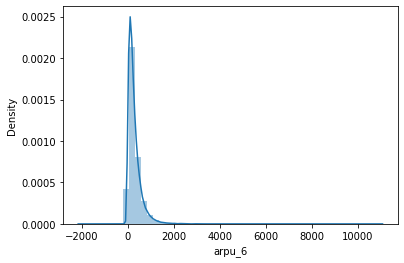

In [80]:
# Plot the average revenue per user in June
univariate(churn_imputed['arpu_6'])


count    33554.000000
mean        45.915887
std        143.909636
min          0.000000
25%          2.000000
50%         13.330000
75%         38.980000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64


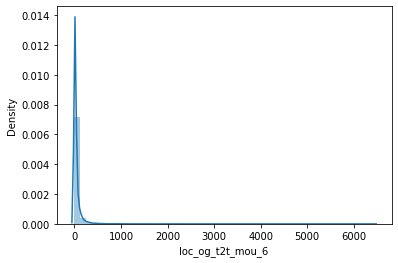

In [81]:
# Plot the minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line

univariate(churn_imputed['loc_og_t2t_mou_6'])

count    33554.000000
mean        79.517748
std        244.297018
min          0.000000
25%          0.000000
50%          0.000000
75%         46.247500
max       6482.440000
Name: std_og_t2t_mou_6, dtype: float64


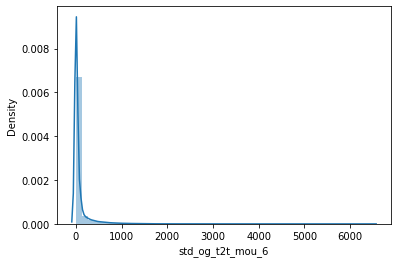

In [82]:
# Plot the minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line

univariate(churn_imputed['std_og_t2t_mou_6'])

count    33554.000000
mean       249.831266
std        576.643805
min          0.000000
25%          7.580000
50%         37.940000
75%        148.925000
max      10752.560000
Name: onnet_mou_8, dtype: float64


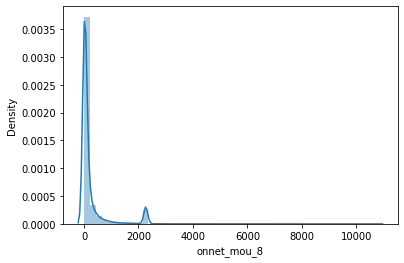

In [83]:
# Plot the minutes of usage of all kind of calls within the same operator network for the month of August

univariate(churn_imputed['onnet_mou_8'])

count    33554.000000
mean       262.989704
std        393.706965
min          0.000000
25%         30.745000
50%        101.735000
75%        291.905000
max       6085.640000
Name: offnet_mou_9, dtype: float64


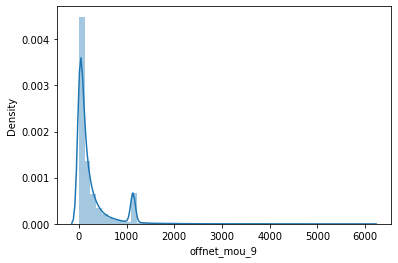

In [84]:
# Plot the minutes of usage of all kind of calls outside the operator T network for the month of September

univariate(churn_imputed['offnet_mou_9'])




## Bivariate EDA

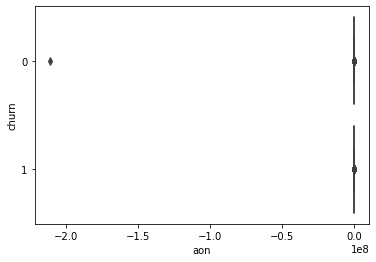

In [85]:
# Plot the relationship between whether the customer churned or not and the age on network (number of days the customer is using the operator T network)
bivariate(churn_imputed['aon'], churn_imputed['churn'])

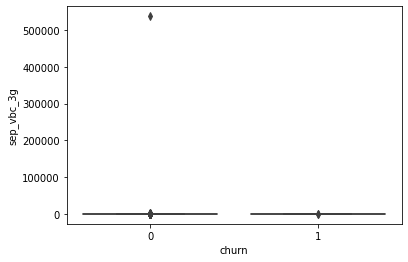

In [86]:
# Plot the relationship between the 3G volume based cost in Sept (when no specific scheme is not purchased and paid as per usage) and whether the customer churned or not
bivariate(churn_imputed['churn'], churn_imputed['sep_vbc_3g'])


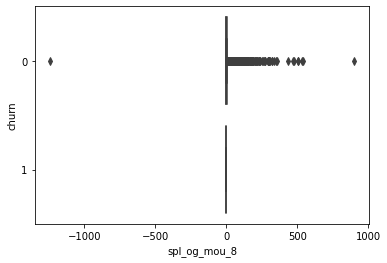

In [45]:
# Plot the relationship between the minutes of usage of special outgoing calls in the month of August and whether the customer churned or not
bivariate(churn_imputed['spl_og_mou_8'], churn_imputed['churn'])




In [46]:
# Plot the relationship between whether the customer churned or not and the night package used by users in August
pd.crosstab(churn_imputed['churn'], churn_imputed['night_pck_user_8'], normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,98.427112,99.977054,100.0
1,1.572888,0.022946,0.0


In [47]:
# Plot the relationship between whether the customer churned or not and the 3G service schemes with validity smaller than a month for the month of August
pd.crosstab(churn_imputed['churn'], churn_imputed['sachet_3g_8'])

sachet_3g_8,0.000000,0.084165,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,12.000000,13.000000,14.000000,15.000000,19.000000,21.000000,23.000000,25.000000,27.000000,38.000000
churn,,,,,,,,,,,,,,,,,,,,,,
0,31715,1,964,221,97,55,30,22,23,10,3,6,3,5,2,1,1,1,1,1,1,1
1,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Task 5: Outlier Treatment

**bold text**### Cap outliers in all numeric variables

In [48]:
# function for capping outliers
def cap_outliers(array):
  # Get the 75% quantile of the array
  q3 = np.percentile(array, 75)

  # Get the 25% quantile of the array
  q1 = np.percentile(array, 25)

  # Get the interquartile range (IQR) (q3 - q1)
  IQR = q3 - q1

  # Calculate the upper limit - 75% quartile + 1.5*IQR
  upper_limit = q3 + 1.5*IQR

  # Calculate the lower limit - 25% quartile - 1.5*IQR
  lower_limit = q1 - 1.5*IQR

  # Perform outlier capping
  # Set all the values in the array above the upper limit to be equal to the upper limit
  array[array > upper_limit] = upper_limit

  # Set all the values in the array below the lower limit to be equal to the lower limit
  array[array < lower_limit] = lower_limit

  return array


In [49]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array))

Array after capping outliers: 
 [-49   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 148]


# Task 6: Modeling

## i) Importing necessary libraries for machine learning and deep learning

In [50]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score,recall_score
from sklearn.metrics import precision_recall_curve, roc_curve

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

## ii) Preprocessing data

In [51]:
# change churn to numeric

### CODE HERE ###
churn_imputed['churn'] = churn_imputed['churn'].replace({'Yes': 1, 'No': 0})

### Train Test split

In [52]:
# Extract input and output data
X = churn_imputed.drop(['churn'], axis=1)
y = churn_imputed['churn']
### CODE HERE ###

In [53]:
# Use dummy variables for categorical variables

### CODE HERE ###
X_dummy = pd.get_dummies(X, columns=cat_cols, drop_first=True)
y_dummy = pd.get_dummies(y, columns=cat_cols, drop_first=True)

In [54]:
# divide data into train and test
# Note: Set the 'random_state' parameter to '4'
# Note: Set the 'test_size' parameter to '0.25'

### CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(25165, 205)

(25165,)

(8389, 205)

(8389,)

In [55]:
X_new = X.to_numpy()

#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X_new,y)

for train_index, test_index in skf.split(X_new,y):
  X_train, X_test = X_new[train_index], X_new[test_index]
  y_train, y_test = y[train_index], y[test_index]

print('\n')
y_train.value_counts()

2

0    16582
1      195
Name: churn, dtype: int64

Observe that the dataset is imbalanced. You should get the number of entries with output '1' approximately 1/10th of the number of entries with output '0'. This means that if we run a simple machine learning model, it should already show 90% accuracy.

But in this case study, it is the most important for the model to predict which customer will churn as this will decide how their business is performing. We have to create a model that will predict the output '1' accurately. But its corresponding number of entries are very less.

Hence, we will be doing some sampling methods to make the data set balanced. 

1) **Random Under-Sampling**: This method basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random under-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 1221 '0' class data entries, then there will be 1221 '1' class data entries by removing the rest. 

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss.

In [56]:
# random under sampling using imblearn
# Use the RandomUnderSampler (RUS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

X_rus, y_rus = RandomUnderSampler(random_state=1).fit_resample(X_train, y_train)

y_rus.value_counts()

0    195
1    195
Name: churn, dtype: int64

In [57]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)
y_train_rus.value_counts()

1    137
0    136
Name: churn, dtype: int64

1) **Random Over-Sampling**: This method basically consists of adding data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random over-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 13780 '1' class data entries, then there will be 13780 '0' class data entries by removing the rest.

In [58]:
# random over sampling with imblearn
# Use the RandomOverSampler (ROS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

X_ros, y_ros = RandomOverSampler(random_state = 1).fit_resample(X_train, y_train)

y_ros.value_counts()

0    16582
1    16582
Name: churn, dtype: int64

In [59]:
#train Test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)
y_train_ros.value_counts()

1    13266
0    13265
Name: churn, dtype: int64

Now, let's test different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.

## Logistic Regression

In [60]:
# Defining the logistic regression model and fit it on the normal X_train and y_train
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Logistic Regression - without balancing'

model = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
model.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets
log_train_acc = accuracy_score(y_train, model.predict(X_train))
log_val_acc = accuracy_score(y_test, model.predict(X_test))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, model.predict(X_test))
precision = precision_score(y_test, model.predict(X_test))
recall = recall_score(y_test, model.predict(X_test))


# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, log_train_acc, log_val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

LogisticRegression(penalty='none', random_state=0)

In [61]:
# Defining the logistic regression model and fit it on the random under sampled X_train_rus and y_train_rus
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Undersampling'

### CODE HERE ###
log_reg_rus = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
log_reg_rus.fit(X_train_rus, y_train_rus)
# Evaluating the accuracy of the training and validation sets

### CODE HERE ###
log_train_acc = accuracy_score(y_train_rus, log_reg_rus.predict(X_train_rus))
log_val_acc = accuracy_score(y_test_rus, log_reg_rus.predict(X_test_rus))
# Calculate the F1 score, Precision and Recall on the validation set

### CODE HERE ###
f_score = f1_score(y_test_rus, log_reg_rus.predict(X_test_rus))
precision = precision_score(y_test_rus, log_reg_rus.predict(X_test_rus))
recall = recall_score(y_test_rus, log_reg_rus.predict(X_test_rus))

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

LogisticRegression(penalty='none', random_state=0)

In [62]:
# Defining the logistic regression model and fit it on the random over sampled X_train_ros and y_train_ros
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Oversampling'

### CODE HERE ###
log_reg_ros = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
log_reg_ros.fit(X_train_ros, y_train_ros)
# Evaluating the accuracy of the training and validation sets

### CODE HERE ###
log_train_acc = accuracy_score(y_train_ros, log_reg_ros.predict(X_train_ros))
log_val_acc = accuracy_score(y_test_ros, log_reg_ros.predict(X_test_ros))
# Calculate the F1 score, Precision and Recall on the validation set

### CODE HERE ###
f_score = f1_score(y_test_ros, log_reg_ros.predict(X_test_ros))
precision = precision_score(y_test_ros, log_reg_ros.predict(X_test_ros))
recall = recall_score(y_test_ros, log_reg_ros.predict(X_test_ros))

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

LogisticRegression(penalty='none', random_state=0)

## Decision Tree

In [63]:
# Defining the decision tree model and fit it on the normal X_train and y_train 
# 'max_depth' is set to 50
# 'random_state' is set to 0
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Decision Tree - without balancing'

tree_clf = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_clf.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets
tree_train_acc = accuracy_score(y_train, tree_clf.predict(X_train))
tree_val_acc = accuracy_score(y_test, tree_clf.predict(X_test))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, tree_clf.predict(X_test))
precision = precision_score(y_test, tree_clf.predict(X_test))
recall = recall_score(y_test, tree_clf.predict(X_test))

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [64]:
# Defining the decision tree model and fit it on the random under sampled X_train_rus and y_train_rus
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Undersampling'

tree_clf_rus = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_clf_rus.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
tree_train_acc = accuracy_score(y_train_rus, tree_clf_rus.predict(X_train_rus))
tree_val_acc = accuracy_score(y_test_rus, tree_clf_rus.predict(X_test_rus))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_rus, tree_clf_rus.predict(X_test_rus))
precision = precision_score(y_test_rus, tree_clf_rus.predict(X_test_rus))
recall = recall_score(y_test_rus, tree_clf_rus.predict(X_test_rus))

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [65]:
# Defining the decision tree model and fit it on the random over sampled X_train_ros and y_train_ros
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Oversampling'

tree_clf_ros = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_clf_ros.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
tree_train_acc = accuracy_score(y_train_ros, tree_clf_ros.predict(X_train_ros))
tree_val_acc = accuracy_score(y_test_ros, tree_clf_ros.predict(X_test_ros))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_ros, tree_clf_ros.predict(X_test_ros))
precision = precision_score(y_test_ros, tree_clf_ros.predict(X_test_ros))
recall = recall_score(y_test_ros, tree_clf_ros.predict(X_test_ros))

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

DecisionTreeClassifier(max_depth=50, random_state=0)

## kNN

In [66]:
# Defining the kNN model and fit it on the normal X_train and y_train 
# 'n_neighbors' is set to 14
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'


# Defining the kNN model and fit it on the normal X_train and y_train 
knn_clf = KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets
knn_train_acc = accuracy_score(y_train, knn_clf.predict(X_train))
knn_val_acc = accuracy_score(y_test, knn_clf.predict(X_test))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, knn_clf.predict(X_test))
precision = precision_score(y_test, knn_clf.predict(X_test))
recall = recall_score(y_test, knn_clf.predict(X_test))

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

KNeighborsClassifier(n_neighbors=14)

In [67]:
# Defining the kNN model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Undersampling'

knn_clf_rus = KNeighborsClassifier(n_neighbors=14)
knn_clf_rus.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
knn_train_acc = accuracy_score(y_train_rus, knn_clf_rus.predict(X_train_rus))
knn_val_acc = accuracy_score(y_test_rus, knn_clf_rus.predict(X_test_rus))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_rus, knn_clf_rus.predict(X_test_rus))
precision = precision_score(y_test_rus, knn_clf_rus.predict(X_test_rus))
recall = recall_score(y_test_rus, knn_clf_rus.predict(X_test_rus))

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

KNeighborsClassifier(n_neighbors=14)

In [68]:
# Defining the kNN model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Oversampling'

knn_clf_ros = KNeighborsClassifier(n_neighbors=14)
knn_clf_ros.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
knn_train_acc = accuracy_score(y_train_ros, knn_clf_ros.predict(X_train_ros))
knn_val_acc = accuracy_score(y_test_ros, knn_clf_ros.predict(X_test_ros))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_ros, knn_clf_ros.predict(X_test_ros))
precision = precision_score(y_test_ros, knn_clf_ros.predict(X_test_ros))
recall = recall_score(y_test_ros, knn_clf_ros.predict(X_test_ros))

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

KNeighborsClassifier(n_neighbors=14)

## Random Forest Classifier

In [69]:
# Defining the Random Forest Classifier model and fit it on the normal X_train and y_train 
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Random Forest - without balancing'

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf_clf.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets
rf_train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
rf_val_acc = accuracy_score(y_test, rf_clf.predict(X_test))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test, rf_clf.predict(X_test))
precision = precision_score(y_test, rf_clf.predict(X_test))
recall = recall_score(y_test, rf_clf.predict(X_test))

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

In [70]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf_clf.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
rf_train_acc = accuracy_score(y_train_rus, rf_clf.predict(X_train_rus))
rf_val_acc = accuracy_score(y_test_rus, rf_clf.predict(X_test_rus))

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_rus, rf_clf.predict(X_test_rus))
precision = precision_score(y_test_rus, rf_clf.predict(X_test_rus))
recall = recall_score(y_test_rus, rf_clf.predict(X_test_rus))


# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

In [71]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
rf_train_acc = rf.score(X_train_rus, y_train_rus)
rf_val_acc = rf.score(X_test_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
y_pred = rf.predict(X_test_rus)
f_score = f1_score(y_test_rus, y_pred)
precision = precision_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

In [72]:
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.996483,0.996304,0.845000,0.824390,0.866667
1,Logistic Regression - Random Undersampling,0.996337,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression - Random Oversampling,0.996834,0.996985,0.996993,0.994005,1.000000
3,Decision Tree - without balancing,1.000000,0.996304,0.847291,0.815166,0.882051
4,Decision Tree - Random Undersampling,1.000000,1.000000,1.000000,1.000000,1.000000
5,Decision Tree - Random Oversampling,1.000000,0.999246,0.999247,0.998494,1.000000
6,kNN - without balancing,0.993384,0.993503,0.666667,0.825758,0.558974
7,kNN - Random Undersampling,0.886447,0.897436,0.901639,0.859375,0.948276
8,kNN - Random Oversampling,0.989032,0.988693,0.988818,0.977883,1.000000
9,Random Forest - without balancing,0.994278,0.996424,0.866667,0.764706,1.000000


In this case study, the most important factor in the prediction performance of a machine learning model is that it should be able to predict the positive class as accurately as possible. This means that the false negatives and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possible. 

There is another factor to consider. The most important factor which can lead to a company loss is the false negatives. This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers. Hence, observing the recall factor is much more important than precision. 

## Hyperparameter tuning using GridSearchCV

In [ ]:
# Choose the model that performs in a robust manner with good accuracy, precision and recall. 
# Especially look out for the recall value because a good recall value means that it is able to accurately classify the data examples of the customers who churned

# Define your model and parameter grid
# Make sure to use random_state value as 0

logistic = LogisticRegression(random_state = 0)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'max_iter': [100, 200, 300]}

# Perform GridSearchCV


grid_search = GridSearchCV(logistic, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
# Display the best combination of parameters obtained from GridSearchCV
grid_search.best_params_





In [ ]:
# Re-fit your model with the combination of parameters obtained from GridSearchCV
# Make sure to use random_state value as 0

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

train_acc = best_model.score(X_train, y_train)
val_acc = best_model.score(X_test, y_test)
print("Training accuracy: {:.2f}%".format(train_acc*100))
print("Validation accuracy: {:.2f}%".format(val_acc*100))

# Calculate the F1 score, Precision and Recall on the validation set

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("F1 score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

In [ ]:
# Find the importance of all the features according to the optimal model defined above

### CODE HERE ###
importances = best_model.coef_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [ ]:
# Create a dataframe with the feature importance in decending order so that the highest important features are shown at the start of the dataframe
# Display the datafram obtained

# Create a dataframe
feature_importances = pd.DataFrame(importances[indices],
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
# Display the dataframe
print(feature_importances)


In [ ]:
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC

# Predict the target variable on the training set
y_train_pred = best_model.predict(X_train)

# Predict the target variable on the validation set
y_val_pred = best_model.predict(X_test)

# Accuracy on the training set
train_acc = accuracy_score(y_train, y_train_pred)
print("Training accuracy: {:.2f}%".format(train_acc*100))

# Accuracy on the validation set
val_acc = accuracy_score(y_test, y_val_pred)
print("Validation accuracy: {:.2f}%".format(val_acc*100))

# Confusion matrix on the training set
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix on the training set:\n", confusion_matrix_train)

# Confusion matrix on the validation set
confusion_matrix_val = confusion_matrix(y_test, y_val_pred)
print("Confusion matrix on the validation set:\n", confusion_matrix_val)

# AUC of ROC on the validation set
y_val_pred_prob = best_model.predict_proba(X_test)[:,1]
val_roc_auc = roc_auc_score(y_test, y_val_pred_prob)
print("AUC of ROC on the validation set: {:.2f}".format(val_roc_auc))


## Neural Networks

In [ ]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 2
# Note: The number of neurons in the second hidden layer is fixed at 64
# Note: The output layer activation function is fixed as 'sigmoid'

# You can change the hyperparameters mentioned as arguments in the create_nn function
# So that you can use them in GridSearchCV hyperparameter tuning
# Feel free to modify the model too and test the model performance
# You can add more types of layers like Dropout, Batch normalization etc.

# Note: The variable hyperparameters list is the activation functions of the hidden layers and number of neurons in the first hidden layer

def create_nn(activation_function = 'relu',hidden1_neurons = 256):
  # Declare an instance of an artificial neural network model using the 'Sequential()' method
  nn = Sequential()
  # keras.Input is the input layer of the neural network
  nn.add(keras.Input(shape=(X_train.shape[1],)))

  # Add a hidden layer using the 'add()' and 'Dense()' methods
  # Note: Set the 'units' parameter to 'hidden1_neurons'  - This specifies the number of neurons in the hidden layer
  # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
  nn.add(Dense(units=hidden1_neurons, activation=activation_function))

  # Add a hidden layer using the 'add()' and 'Dense()' methods
  # Note: Set the 'units' parameter to 64  - This specifies the number of neurons in the hidden layer
  # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
  nn.add(Dense(units=64, activation=activation_function))

  # Add the output layer using the 'add()' and 'Dense()' methods
  # Note: Set the 'units' parameter to 1 - Binary classification
  # Note: Set the 'activation' parameter to 'sigmoid' - The sigmoid activation function is used for output layer neurons in binary classification tasks
  nn.add(Dense(units=1, activation='sigmoid'))
    
  # Compile the model using the 'compile()' method
  # Note: Set the 'loss' parameter to 'binary_crossentropy' - The binary crossentropy loss function is commonly used for binary classification tasks
  # Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
  # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'learning_rate_value' - This specifies the learning rate value defined in the custom function
  nn.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=RMSprop())
    
  return nn


In [ ]:
# Create a default neural network using the 'create_nn' function and train it on the training data
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

In [ ]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

In [ ]:
# Initialize a basic NN object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn' function into a 'KerasClassifier' object
base_grid_model = KerasClassifier(build_fn=create_nn, batch_size=32, epochs=10)

# Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {'activation_function': ['relu','sigmoid'],
                   'hidden1_neurons': [256, 512]}

grid = GridSearchCV(estimator=base_grid_model, param_grid=parameters_grid, cv=2, verbose=4)

# Train the model on the training data using the 'fit()' method
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
# Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place

grid_model = grid.fit(X_train, y_train)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['activation_function']
best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
best_accuracy = grid_model.best_score_

print('\n The optimal value of convolution filter size is', best_activation_function)
print('\n The optimal value of maxpooling filter size is', best_hidden1_neurons)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

In [ ]:
# Retrain the model with the optimal combination of hyperparameters and save its training history

# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter
nn1 = create_nn(activation_function=best_activation_function, hidden1_neurons=best_hidden1_neurons)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

## Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact. 

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost. Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.


In [ ]:
# Define the false positive and false negative missclassification cost here

fn_cost = 500
fp_cost = 500


#### We will use the optimal model and its corresponding data set that was implemented in the GridSearchCV section. Let's first see the performance metrics of the trained model.

In [ ]:
# Use the most optimal machine learning model that you obtained from the GridSearchCV section and the corresponding data set you used (normal, RUS or ROS)
optimal_model = grid_model.best_estimator_

# Evaluating the accuracy of the training and validation sets
train_acc = optimal_model.score(X_train, y_train)
val_acc = optimal_model.score(X_test, y_test)

# Calculate the F1 score, Precision and Recall on the validation set
y_pred = optimal_model.predict(X_test)
f_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

In [ ]:
new_evaluate_df

#### We now calculate the current misclassification cost in the validation set.

In [ ]:
# Obtain the count of false positive and false negative classifications from your model
fp_count, fn_count, _, _ = confusion_matrix(y_test, y_pred).ravel()

# Calculate the total misclassification cost using the FN and FP cost and FN and FP count
misclassification_cost = (fp_count * fp_cost) + (fn_count * fn_cost)

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)


#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

In [ ]:
# Predict probabilities for the training set and retain them for only positive outcomes
lr_probs_train = optimal_model.predict_proba(X_train)[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_val = optimal_model.predict_proba(X_val)[:, 1]

In [ ]:
# Calculate and store the misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]

for cutoff in np.arange(0, 1, 0.01):

  # Get the classification predictions using the probabilities obtained for the training data set and the cutoff
  # Get the false positive and false negative count from the predictions
  # Calculate the training misclassification cost and append it to the cost_train array
  curr_preds = lr_probs_train > cutoff
  curr_fp_count, curr_fn_count, _, _ = confusion_matrix(y_train, curr_preds).ravel()
  curr_misclassification_cost = (curr_fp_count * fp_cost) + (curr_fn_count * fn_cost)
  cost_train.append(curr_misclassification_cost)

  # Get the classification predictions using the probabilities obtained for the validation data set and the cutoff
  # Get the false positive and false negative count from the predictions
  # Calculate the training misclassification cost and append it to the cost_val array
  curr_preds = lr_probs_val > cutoff
  curr_fp_count, curr_fn_count, _, _ = confusion_matrix(y_test, curr_preds).ravel()
  curr_misclassification_cost = (curr_fp_count * fp_cost) + (curr_fn_count * fn_cost)

  cost_val.append(curr_misclassification_cost)

# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)

# Plot misclassification cost against cut-off value
plt.plot(cutoffs,cost_train, label='Training')
plt.plot(cutoffs,cost_val, label='Validaiton')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.show()

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff));
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);